In [132]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kto_201901 = pd.read_excel('./files/kto_201901.xlsx',
                          header = 1,
                          usecols = 'A:G',
                          skipfooter = 4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [3]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [5]:
condition = (kto_201901['관광'] == 0)| \
            (kto_201901['상용'] == 0) | \
            (kto_201901['공용'] == 0) | \
            (kto_201901['유학/연수'] == 0)

kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [6]:
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [7]:
kto_201901['국적'].unique()
# kto_201901['국적'].value_counts()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [8]:
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [9]:
condition = kto_201901['국적'].isin(continents_list)
kto_201901_country = kto_201901[~condition]
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [10]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [11]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 \
+ ['아프리카']*2 + ['기타대륙'] + ['교포']
# continents

kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


##### 국적별 관광객 비율 살펴보기

In [12]:
kto_201901_country_newindex['관광객비율(%)'] = \
        round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 2)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.27


In [13]:
kto_201901_country_newindex.sort_values(by=['관광객비율(%)'], 
                                        ascending = False)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.51
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.27


In [14]:
kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', 
                                        index = '대륙')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.110000
아메리카,68.196000
아시아,59.618800
아프리카,32.675000
오세아니아,84.806667
유럽,63.823043


In [17]:
condition = kto_201901_country_newindex['국적'] == '중국'

kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.49


In [24]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [26]:
kto_201901_country_newindex['전체비율(%)'] = \
    round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 2)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26,22.48
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23,9.77
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54,3.92
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.51,0.28
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.27,3.85


In [31]:
kto_201901_country_newindex.sort_values(by = '전체비율(%)', 
                                        ascending = False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.49,36.20
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.26,22.48
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.23,9.77
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.52,4.86
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.54,3.92


#### 전처리 과정을 함수로 만들기

In [108]:
def create_kto_data(yy, mm):
    # 파일 경로 설정
    file_path = './files/kto_{}{}.xlsx'.format(yy,mm)  
    
    # 엑셀파일 가져오기
    df = pd.read_excel(file_path,
                       header = 1,
                       usecols = 'A:G',
                       skipfooter = 4)
    
    # 기준년월 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy,mm)
    
    # 국적 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = df['국적'].isin(ignore_list)
    df_country = df[~condition].reset_index(drop=True)
    
    # 대륙 칼럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + \
                 ['아프리카']*2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents
    
    # 관광객비율(%) 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country['관광'] / df_country['계'] * 100, 2)
    
    # 전체비율(%) 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 2)
    
    # 결과 출력
    return df_country

In [109]:
kto_test = create_kto_data(2010,'01')
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,96.96,50.60
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.32,8.93
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.39,3.46
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.00,0.14
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.08,3.34


In [111]:
# 월의 형태가 '01' 일때의 문제 zfill 함수를 사용하여 해결
# 202006이후 파일 존재하지 않아 발생하는 문제 try/except 구문을 사용하여 해결
df = pd.DataFrame()

for yy in range(2010,2021):
    for mm in range(1,13):
        try :
            mm_str=str(mm).zfill(2)
            temp = create_kto_data(yy,mm_str)
            df = df.append(temp, ignore_index = True)
        except:
            pass

In [129]:
df.to_excel('./files/kto_total_new.xlsx', index = False)

###### 국적별 필터링된 데이터를 엑셀파일로 저장하기

In [128]:
cntry_list = df['국적'].unique()
for cntry in cntry_list :
    condition = (df['국적'] == cntry)
    df_cntry = df[condition]
    file_path = './files/new/[국적별 관광객 데이터] {}.xlsx'.format(cntry)
    df_cntry.to_excel(file_path, index=False)

### 4.3 데이터 시각화

In [130]:
path = ('c:/Windows/Fonts/malgun.ttf')
font_name = font_manager.FontProperties(fname = path).get_name()
# font_name
rc('font', family = font_name)

In [135]:
df_filter = df[df['국적']=='중국']
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.30,10.09
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.10,13.57
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.58,9.23
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.05,15.51
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.80,16.95
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.66,38.17
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.58,9.83
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.37,16.00
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.27,10.17


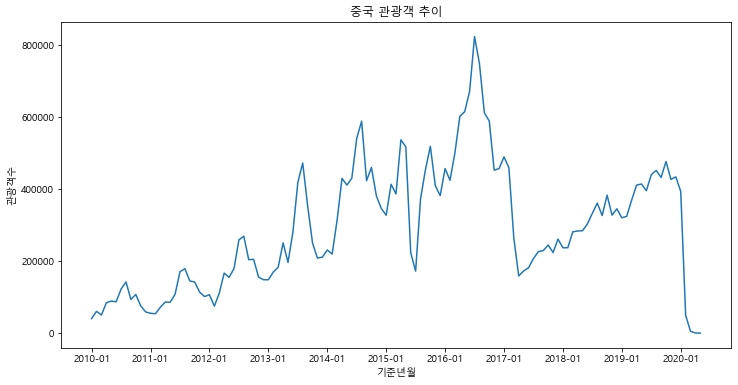

In [144]:
plt.figure(figsize = (12,6))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])
plt.show()